In [3]:
%run SAT_help_functions.ipynb

In [2]:
n_trials = 1000
sim_num = 100

prior_DDM = utils.BoxUniform(low=[0,0.5,0.1], high=[4,2,1]) #vakter
param_DDM = prior_DDM.sample((sim_num,))

In [3]:
par_fitted = np.zeros((sim_num,4))

for i in range(sim_num):
    print(i)
    v,a,ter = param_DDM[i]
    model_sim = Model(name='Simple model (simulated)',
                      drift=DriftConstant(drift=v),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=a),
                      overlay=OverlayNonDecision(nondectime=ter),
                      dx=.01, dt=.01, T_dur=5)   
    sol = model_sim.solve()
    samp = sol.resample(1000)
    
    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                        t = 0,
                                        x=Fittable(minval=-10, maxval=10)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.5, maxval=8)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                      dx=.01, dt=.01, T_dur=5)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['drift']['x'])
    par_fitted[i,3] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(param_DDM[i,:])
    print(par_fitted[i,:])

0


Info: Params [ 0.14642453 -1.06088048  0.73945532  0.50356211] gave 2418.6789981342736


tensor([0.2056, 0.8364, 0.4963])
[ 0.14642453  0.73945532 -1.06088048  0.50356211]
1


Info: Params [3.14553452 0.1986555  0.64709052 0.82048653] gave -1377.8205564995824


tensor([2.9791, 0.7112, 0.8085])
[3.14553452 0.64709052 0.1986555  0.82048653]
2


Info: Params [3.99714837 4.04091702 1.14988129 0.6353728 ] gave -1852.8855645839435


tensor([3.8101, 0.7681, 0.6468])
[3.99714837 1.14988129 4.04091702 0.6353728 ]
3


Info: Params [2.40477434 0.91440054 1.15871596 0.7363503 ] gave -210.57364744605053


tensor([2.5655, 1.1190, 0.7265])
[2.40477434 1.15871596 0.91440054 0.7363503 ]
4


Info: Params [2.41019667 0.22764228 1.91378668 0.94020273] gave 506.9022953850647


tensor([2.3989, 1.7445, 0.9677])
[2.41019667 1.91378668 0.22764228 0.94020273]
5


Info: Params [0.22110694 0.69022099 1.75975656 0.50481386] gave 3563.620094887242


tensor([0.1780, 1.4956, 0.5545])
[0.22110694 1.75975656 0.69022099 0.50481386]
6


Info: Params [ 3.72856617 -1.80696728  1.48693483  0.92651835] gave 203.60339921203692


tensor([2.7452, 1.7862, 0.8647])
[ 3.72856617  1.48693483 -1.80696728  0.92651835]
7


Info: Params [ 2.21114963 -2.14970472  0.56383419  0.45843783] gave -454.9994541912815


tensor([2.1534, 0.6715, 0.4387])
[ 2.21114963  0.56383419 -2.14970472  0.45843783]
8


Info: Params [ 0.21499731 -1.82362498  0.67397185  0.98001596] gave 2279.4459922775736


tensor([0.2192, 0.8001, 0.9615])
[ 0.21499731  0.67397185 -1.82362498  0.98001596]
9


Info: Params [2.41561648 0.65884134 1.00739324 0.22939227] gave -290.25330714823906


tensor([2.3595, 0.9512, 0.2165])
[2.41561648 1.00739324 0.65884134 0.22939227]
10


Info: Params [ 3.46920468 -1.22055362  1.52540681  0.72108912] gave 91.99742858362683


tensor([2.7157, 1.7268, 0.6800])
[ 3.46920468  1.52540681 -1.22055362  0.72108912]
11


Info: Params [ 1.82863262 -1.9820887   0.79043389  0.96148266] gave 725.3130506447609


tensor([1.7096, 1.0875, 0.9030])
[ 1.82863262  0.79043389 -1.9820887   0.96148266]
12


Info: Params [ 4.15890564 -0.14800215  1.61643603  0.32426031] gave -903.0489431339778


tensor([3.7197, 1.4658, 0.3380])
[ 4.15890564  1.61643603 -0.14800215  0.32426031]
13


Info: Params [ 1.42842632 -0.45493853  1.17799368  0.68028926] gave 1596.6798929831875


tensor([1.3921, 1.3410, 0.6377])
[ 1.42842632  1.17799368 -0.45493853  0.68028926]
14


Info: Params [0.15860205 0.79752155 2.59318704 0.13089606] gave 3622.92546272736


tensor([0.1456, 1.6382, 0.3880])
[0.15860205 2.59318704 0.79752155 0.13089606]
15


Info: Params [0.74679636 0.37294521 1.78642615 0.42625088] gave 3030.503704467344


tensor([0.6489, 1.5989, 0.4262])
[0.74679636 1.78642615 0.37294521 0.42625088]
16


Info: Params [ 4.38391364 -0.58919191  1.54941794  0.42228685] gave -894.0419125636871


tensor([3.9420, 1.8225, 0.3578])
[ 4.38391364  1.54941794 -0.58919191  0.42228685]
17


Info: Params [ 3.19673989 -2.70425037  0.78400844  0.23471827] gave -642.2632021828994


tensor([2.9090, 1.0763, 0.1870])
[ 3.19673989  0.78400844 -2.70425037  0.23471827]
18


Info: Params [ 0.59703932 -0.00440422  1.16319385  0.87381668] gave 3026.953472890502


tensor([0.5715, 1.3206, 0.8003])
[ 0.59703932  1.16319385 -0.00440422  0.87381668]
19


Info: Params [ 1.94185484 -1.36637978  0.97939844  0.49627621] gave 802.6770874360369


tensor([1.6453, 1.2038, 0.4470])
[ 1.94185484  0.97939844 -1.36637978  0.49627621]
20


Info: Params [ 1.32222087 -0.2776584   1.04848378  0.3539589 ] gave 1531.506418439049


tensor([1.2573, 1.1014, 0.3336])
[ 1.32222087  1.04848378 -0.2776584   0.3539589 ]
21


Info: Params [ 2.95325553 -0.16758639  1.65005126  0.92659679] gave 44.67501838125601


tensor([2.8723, 1.8842, 0.8788])
[ 2.95325553  1.65005126 -0.16758639  0.92659679]
22


Info: Params [1.30295273 0.10704407 1.17951865 0.85934698] gave 1597.561411331847


tensor([1.3273, 1.1673, 0.8500])
[1.30295273 1.17951865 0.10704407 0.85934698]
23


Info: Params [ 0.87259832 -0.08503303  1.35812355  0.4817693 ] gave 2791.4539926607267


tensor([0.8232, 1.4539, 0.4459])
[ 0.87259832  1.35812355 -0.08503303  0.4817693 ]
24


Info: Params [ 0.69777034 -1.22276684  0.59578408  0.6398678 ] gave 1205.0287167163697


tensor([0.5749, 0.6659, 0.6116])
[ 0.69777034  0.59578408 -1.22276684  0.6398678 ]
25


Info: Params [0.36344541 1.1223576  0.98555531 0.98622574] gave 2288.7321422420378


tensor([0.3694, 0.8411, 0.9950])
[0.36344541 0.98555531 1.1223576  0.98622574]
26


Info: Params [3.34380637 2.13903042 2.15823438 0.9609626 ] gave -876.4642912491273


tensor([3.7985, 1.5311, 0.9977])
[3.34380637 2.15823438 2.13903042 0.9609626 ]
27


Info: Params [2.06374398 1.50834422 0.75649908 0.95904666] gave -373.20366428471596


tensor([2.0161, 0.6992, 0.9571])
[2.06374398 0.75649908 1.50834422 0.95904666]
28


Info: Params [ 2.91769649 -1.40939437  0.90982992  0.51928191] gave -416.36298260406676


tensor([2.6821, 1.1465, 0.4681])
[ 2.91769649  0.90982992 -1.40939437  0.51928191]
29


Info: Params [ 0.77487114 -0.13785684  1.38419477  0.87949673] gave 3024.026862910235


tensor([0.7062, 1.5167, 0.8226])
[ 0.77487114  1.38419477 -0.13785684  0.87949673]
30


Info: Params [3.58361837 1.45123186 0.85201123 0.16361326] gave -1537.594059572716


tensor([3.5830, 0.8854, 0.1417])
[3.58361837 0.85201123 1.45123186 0.16361326]
31


Info: Params [1.47654821 0.04779672 1.78836422 0.33547327] gave 1820.7582737732032


tensor([1.5067, 1.9117, 0.2941])
[1.47654821 1.78836422 0.04779672 0.33547327]
32


Info: Params [ 1.62831358 -0.24189032  1.28528338  0.84485372] gave 1297.5325705726295


tensor([1.6228, 1.4572, 0.7990])
[ 1.62831358  1.28528338 -0.24189032  0.84485372]
33


Info: Params [ 1.7369158  -0.9911666   0.83455289  0.43758267] gave 676.7426698240635


tensor([1.6780, 0.9610, 0.4011])
[ 1.7369158   0.83455289 -0.9911666   0.43758267]
34


Info: Params [ 0.77194866 -1.54653952  0.88646734  0.44657887] gave 2731.7429002969343


tensor([0.6874, 1.1456, 0.3980])
[ 0.77194866  0.88646734 -1.54653952  0.44657887]
35


Info: Params [ 2.53619437 -1.3569614   0.94191407  0.48433198] gave 22.209012235505433


tensor([2.4071, 1.2143, 0.4243])
[ 2.53619437  0.94191407 -1.3569614   0.48433198]
36


Info: Params [0.21453738 0.17919121 1.06816022 0.65503452] gave 3207.9072116337748


tensor([0.2523, 1.0672, 0.6293])
[0.21453738 1.06816022 0.17919121 0.65503452]
37


Info: Params [0.15885645 0.36382486 0.96485834 0.38661118] gave 2796.874933147008


tensor([0.2308, 0.9215, 0.3900])
[0.15885645 0.96485834 0.36382486 0.38661118]
38


Info: Params [ 2.89606367 -1.44755712  0.61928882  0.85368449] gave -1060.7388360147552


tensor([2.6680, 0.7037, 0.8363])
[ 2.89606367  0.61928882 -1.44755712  0.85368449]
39


Info: Params [ 1.30346386 -0.40154773  1.16658086  0.78033341] gave 1808.5317083766895


tensor([1.3123, 1.3257, 0.7461])
[ 1.30346386  1.16658086 -0.40154773  0.78033341]
40


Info: Params [ 0.06340438 -1.0456254   0.94913545  0.60137458] gave 3659.07637641097


tensor([0.0851, 1.1940, 0.5443])
[ 0.06340438  0.94913545 -1.0456254   0.60137458]
41


Info: Params [ 1.87072729 -1.7677959   0.74866831  0.85039684] gave 463.82900436028854


tensor([1.7477, 0.9240, 0.8111])
[ 1.87072729  0.74866831 -1.7677959   0.85039684]
42


Info: Params [0.89490013 0.14921423 1.26066337 0.42307087] gave 2545.5354364232567


tensor([0.8967, 1.2623, 0.4087])
[0.89490013 1.26066337 0.14921423 0.42307087]
43


Info: Params [ 3.68746146 -0.4355732   1.37824036  0.39300704] gave -678.3740558871194


tensor([3.5872, 1.7022, 0.3219])
[ 3.68746146  1.37824036 -0.4355732   0.39300704]
44


Info: Params [ 4.08822433 -1.4145507   0.72869112  0.36061658] gave -1671.1726011356095


tensor([3.9537, 0.9145, 0.3322])
[ 4.08822433  0.72869112 -1.4145507   0.36061658]
45


Info: Params [ 2.56207779 -6.18669661  0.54165075  0.35128759] gave -328.2243491237714


tensor([2.1540, 0.7906, 0.3179])
[ 2.56207779  0.54165075 -6.18669661  0.35128759]
46


Info: Params [ 0.71282719 -0.32091092  0.60035104  0.87613415] gave 1033.2469604217813


tensor([0.7213, 0.6450, 0.8612])
[ 0.71282719  0.60035104 -0.32091092  0.87613415]
47


Info: Params [ 4.08866532 -0.84251087  1.36310201  0.71691811] gave -792.2429268495988


tensor([3.8960, 1.7782, 0.6478])
[ 4.08866532  1.36310201 -0.84251087  0.71691811]
48


Info: Params [ 2.44284426 -0.78476425  1.73049135  0.39103057] gave 1140.9504938239156


tensor([1.9633, 1.9595, 0.3364])
[ 2.44284426  1.73049135 -0.78476425  0.39103057]
49


Info: Params [ 1.42778166 -0.85033519  0.92725639  0.73253769] gave 1322.15972130829


tensor([1.3065, 1.0812, 0.6907])
[ 1.42778166  0.92725639 -0.85033519  0.73253769]
50


Info: Params [ 1.95950822 -0.48772908  0.90094466  0.28274635] gave 367.11573891587454


tensor([1.9008, 1.0027, 0.2541])
[ 1.95950822  0.90094466 -0.48772908  0.28274635]
51


Info: Params [ 3.63052319 -2.07377028  1.10983487  0.57894471] gave -368.5794831919175


tensor([3.0059, 1.4684, 0.5026])
[ 3.63052319  1.10983487 -2.07377028  0.57894471]
52


Info: Params [ 4.10464467 -1.9397844   1.2253982   0.93175866] gave -545.8009151782093


tensor([3.3206, 1.4508, 0.8936])
[ 4.10464467  1.2253982  -1.9397844   0.93175866]
53


Info: Params [0.66302202 0.55342517 1.84992132 0.77049505] gave 3023.5432934870164


tensor([0.5854, 1.5255, 0.8425])
[0.66302202 1.84992132 0.55342517 0.77049505]
54


Info: Params [0.46197715 0.23870409 1.07653358 0.50455263] gave 2950.1276867986976


tensor([0.4522, 1.0403, 0.4952])
[0.46197715 1.07653358 0.23870409 0.50455263]
55


Info: Params [ 3.24566799 -2.55052652  0.58977442  0.41507697] gave -1304.3299704067836


tensor([3.0731, 0.7150, 0.3913])
[ 3.24566799  0.58977442 -2.55052652  0.41507697]
56


Info: Params [1.75600361 0.51161709 0.50663587 0.23284587] gave -501.1048397080734


tensor([1.6888, 0.5241, 0.2204])
[1.75600361 0.50663587 0.51161709 0.23284587]
57


Info: Params [ 2.13249823 -1.53663026  0.8312333   0.39629621] gave 295.01825731336976


tensor([2.0604, 1.0457, 0.3559])
[ 2.13249823  0.8312333  -1.53663026  0.39629621]
58


Info: Params [2.73136872 0.80103695 0.50920148 0.22413662] gave -1354.9394114868192


tensor([2.6715, 0.5179, 0.2168])
[2.73136872 0.50920148 0.80103695 0.22413662]
59


Info: Params [ 2.49280538 -0.38535367  0.50237451  0.99435448] gave -1049.6265305467064


tensor([2.1702, 0.5172, 0.9844])
[ 2.49280538  0.50237451 -0.38535367  0.99435448]
60


Info: Params [ 4.5676885  -0.74621618  1.6831141   0.48452105] gave -822.4256637759379


tensor([3.7884, 1.7309, 0.4547])
[ 4.5676885   1.6831141  -0.74621618  0.48452105]
61


Info: Params [2.86026899 2.36145464 0.94059818 0.18370184] gave -1193.2659812973516


tensor([3.2291, 0.8505, 0.1864])
[2.86026899 0.94059818 2.36145464 0.18370184]
62


Info: Params [0.61793112 0.21624726 1.41326232 0.43341773] gave 3201.613744139342


tensor([0.5499, 1.3901, 0.4091])
[0.61793112 1.41326232 0.21624726 0.43341773]
63


Info: Params [ 1.69631868 -1.18107533  0.8937017   0.51688739] gave 939.5947964771624


tensor([1.7192, 1.1406, 0.4542])
[ 1.69631868  0.8937017  -1.18107533  0.51688739]
64


Info: Params [0.42489987 0.34065626 1.30233892 0.13961954] gave 3411.6391416699003


tensor([0.4386, 1.2598, 0.1263])
[0.42489987 1.30233892 0.34065626 0.13961954]
65


Info: Params [ 1.63019469 -1.53244086  0.91532111  0.3296195 ] gave 1219.0738911710469


tensor([1.4433, 1.1730, 0.2747])
[ 1.63019469  0.91532111 -1.53244086  0.3296195 ]
66


Info: Params [ 2.24818782 -0.92114963  1.04966954  0.99475834] gave 392.9480977133303


tensor([2.1390, 1.2823, 0.9478])
[ 2.24818782  1.04966954 -0.92114963  0.99475834]
67


Info: Params [ 2.09166823 -1.21967539  0.65905286  0.20927503] gave -179.11937114798258


tensor([1.8850, 0.7284, 0.1808])
[ 2.09166823  0.65905286 -1.21967539  0.20927503]
68


Info: Params [0.54493601 0.0628993  0.78092435 0.74962694] gave 1981.4466147740159


tensor([0.5487, 0.8066, 0.7288])
[0.54493601 0.78092435 0.0628993  0.74962694]
69


Info: Params [ 3.71082167 -0.85774434  1.45777027  0.82407992] gave -413.1856929838397


tensor([3.0531, 1.4898, 0.8019])
[ 3.71082167  1.45777027 -0.85774434  0.82407992]
70


Info: Params [ 1.18883336 -0.03325977  1.04589579  0.61133517] gave 1686.2738743162931


tensor([1.1979, 1.1029, 0.5895])
[ 1.18883336  1.04589579 -0.03325977  0.61133517]
71


Info: Params [ 3.22481466 -2.86723918  0.7274483   0.15361722] gave -809.1340337836235


tensor([2.9288, 0.9667, 0.1178])
[ 3.22481466  0.7274483  -2.86723918  0.15361722]
72


Info: Params [ 3.43411339 -3.04161203  0.53402323  0.96175779] gave -1561.5104005747476


tensor([3.2738, 0.6735, 0.9499])
[ 3.43411339  0.53402323 -3.04161203  0.96175779]
73


Info: Params [ 4.08964441 -2.9274075   0.92899957  0.55177393] gave -850.9581827415115


tensor([3.2995, 1.1804, 0.5130])
[ 4.08964441  0.92899957 -2.9274075   0.55177393]
74


Info: Params [3.82252317 3.5845476  0.58121237 0.9966852 ] gave -2216.8895351453193


tensor([3.7198, 0.5118, 0.9951])
[3.82252317 0.58121237 3.5845476  0.9966852 ]
75


Info: Params [ 2.71278577 -2.88829045  0.73683205  0.24844729] gave -299.04345431410894


tensor([2.3082, 0.9945, 0.1949])
[ 2.71278577  0.73683205 -2.88829045  0.24844729]
76


Info: Params [ 6.         -6.97886313  0.69050001  0.32264989] gave -1862.7237855134522


tensor([3.9524, 0.8527, 0.2993])
[ 6.          0.69050001 -6.97886313  0.32264989]
77


Info: Params [1.20327888 0.3495821  0.5059109  0.8033272 ] gave -8.418408179253277


tensor([1.1090, 0.5224, 0.7934])
[1.20327888 0.5059109  0.3495821  0.8033272 ]
78


Info: Params [ 3.72052247 -2.70352357  1.15727602  0.49155369] gave -3.4275540884329914


tensor([2.6477, 1.4913, 0.4253])
[ 3.72052247  1.15727602 -2.70352357  0.49155369]
79


Info: Params [0.43762121 1.16350069 0.64563465 0.26144258] gave 1079.2118628823268


tensor([0.4276, 0.6242, 0.2534])
[0.43762121 0.64563465 1.16350069 0.26144258]
80


Info: Params [ 1.47372464 -0.17323213  1.05733078  0.18999314] gave 1232.3150947587615


tensor([1.4513, 1.1218, 0.1700])
[ 1.47372464  1.05733078 -0.17323213  0.18999314]
81


Info: Params [ 1.72274749 -0.05284206  0.63792058  0.89643734] gave 23.995209174603588


tensor([1.6837, 0.6565, 0.8814])
[ 1.72274749  0.63792058 -0.05284206  0.89643734]
82


Info: Params [ 2.15321152 -0.00806339  1.54869288  0.42223976] gave 682.6692932684073


tensor([2.0436, 1.4659, 0.4339])
[ 2.15321152  1.54869288 -0.00806339  0.42223976]
83


Info: Params [ 1.10154538 -0.66264077  1.3482902   0.21749837] gave 2636.0312886135252


tensor([1.0313, 1.7185, 0.1314])
[ 1.10154538  1.3482902  -0.66264077  0.21749837]
84


Info: Params [3.56073272 1.02168973 1.56757951 0.51017854] gave -954.7391473779052


tensor([3.6639, 1.4721, 0.4928])
[3.56073272 1.56757951 1.02168973 0.51017854]
85


Info: Params [0.75329467 0.12641503 0.77874984 0.2730383 ] gave 1675.4093750917577


tensor([0.8243, 0.7700, 0.2692])
[0.75329467 0.77874984 0.12641503 0.2730383 ]
86


Info: Params [ 0.52680439 -4.47387671  0.50232317  0.62661514] gave 1327.034448643813


tensor([0.5085, 0.6741, 0.5934])
[ 0.52680439  0.50232317 -4.47387671  0.62661514]
87


Info: Params [1.87820922 0.58612825 1.32546838 0.99403415] gave 616.1389202826562


tensor([1.8706, 1.2156, 0.9947])
[1.87820922 1.32546838 0.58612825 0.99403415]
88


Info: Params [ 0.63909592 -0.00305879  1.11962031  0.13495973] gave 2888.746070835589


tensor([0.5812, 1.1435, 0.1088])
[ 0.63909592  1.11962031 -0.00305879  0.13495973]
89


Info: Params [2.47467095 1.17945389 0.77105771 0.99140844] gave -734.9114198444474


tensor([2.4834, 0.7260, 0.9960])
[2.47467095 0.77105771 1.17945389 0.99140844]
90


Info: Params [ 3.46462978 -1.34606954  1.39846507  0.44355123] gave -23.896316012073086


tensor([2.9499, 1.8330, 0.3606])
[ 3.46462978  1.39846507 -1.34606954  0.44355123]
91


Info: Params [ 1.85449432 -0.64078208  1.06201067  0.73264571] gave 821.6271593466954


tensor([1.7869, 1.2714, 0.6875])
[ 1.85449432  1.06201067 -0.64078208  0.73264571]
92


Info: Params [0.81223561 0.58834168 1.65393705 0.69094034] gave 2785.2670194057714


tensor([0.8357, 1.4526, 0.7092])
[0.81223561 1.65393705 0.58834168 0.69094034]
93


Info: Params [ 3.45058382 -1.72847732  1.35192877  0.38773958] gave 150.7030673903429


tensor([2.6868, 1.6843, 0.3158])
[ 3.45058382  1.35192877 -1.72847732  0.38773958]
94


Info: Params [0.03011247 0.81976891 1.5440403  0.72877989] gave 3551.700150389222


tensor([0.0669, 1.2446, 0.7866])
[0.03011247 1.5440403  0.81976891 0.72877989]
95


Info: Params [3.37089095 2.07218065 2.3268408  0.96820073] gave -834.7355925083954


tensor([3.7467, 1.7130, 0.9533])
[3.37089095 2.3268408  2.07218065 0.96820073]
96


Info: Params [1.30555241 0.01631822 1.87961033 0.6726591 ] gave 2186.250707444305


tensor([1.1489, 1.8244, 0.6597])
[1.30555241 1.87961033 0.01631822 0.6726591 ]
97


Info: Params [1.49173564 0.02236249 0.66582903 0.50904238] gave 371.10317140877


tensor([1.4778, 0.6820, 0.4928])
[1.49173564 0.66582903 0.02236249 0.50904238]
98


Info: Params [ 1.11642954 -0.73683395  0.67418347  0.19600495] gave 1039.6610618127447


tensor([1.1326, 0.7449, 0.1766])
[ 1.11642954  0.67418347 -0.73683395  0.19600495]
99


Info: Params [ 3.39874945 -0.75811061  1.51605298  0.60141682] gave -141.64267421357488


tensor([2.9998, 1.7546, 0.5566])
[ 3.39874945  1.51605298 -0.75811061  0.60141682]


In [4]:
param_DDM = np.array(pd.read_csv("crossfit_simulated.csv"))[:,1:]
par_fitted = np.array(pd.read_csv("crossfit_recovered.csv"))[:,1:]


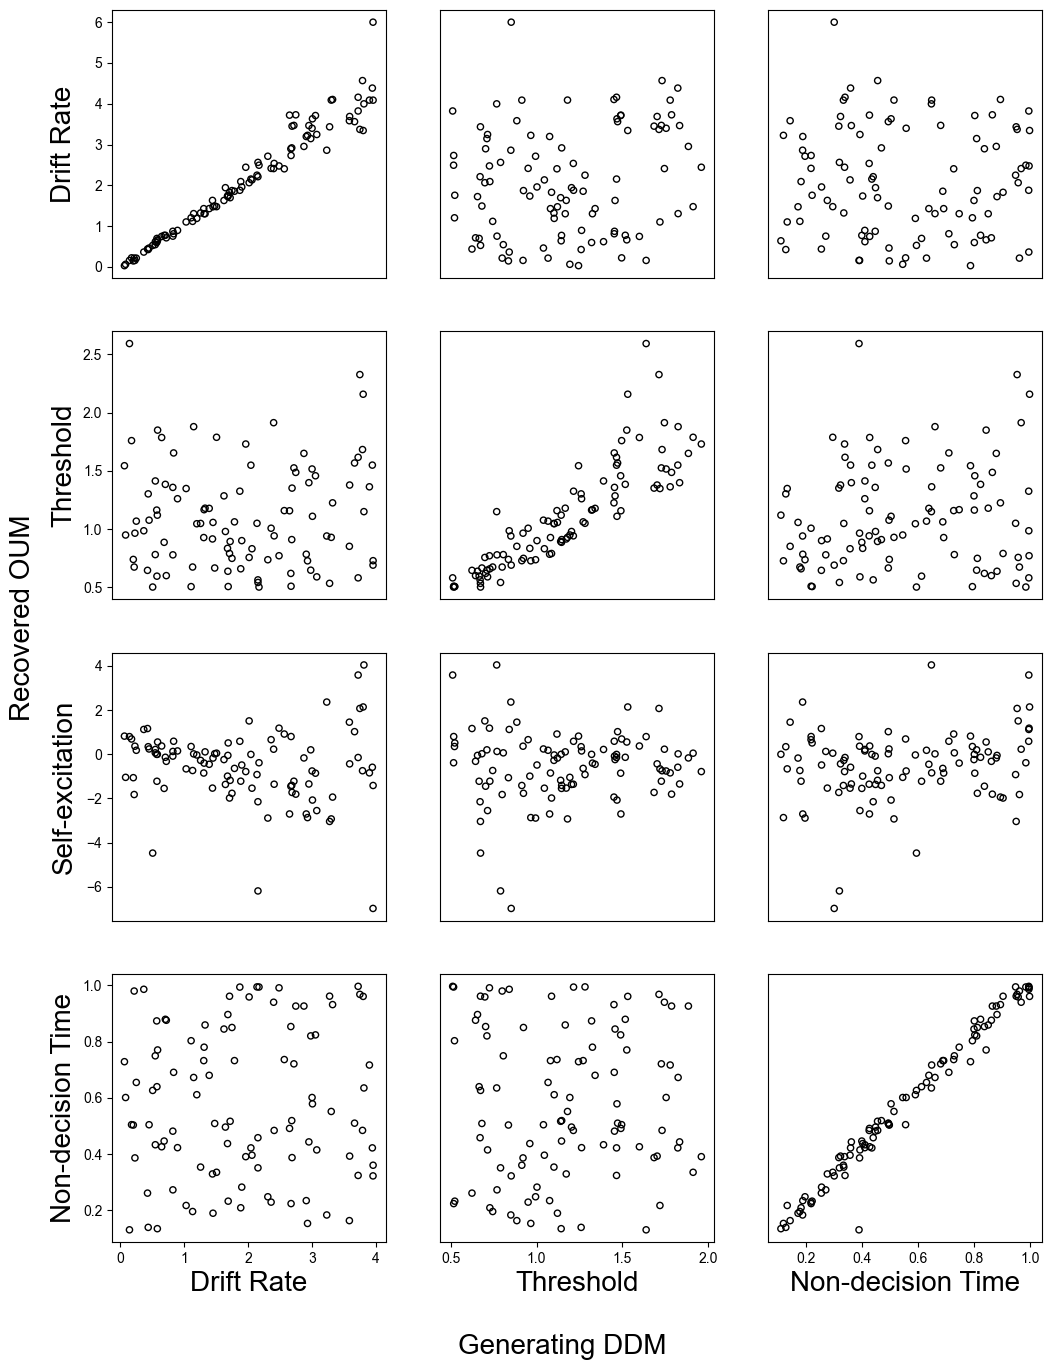

In [6]:
par_labels = ["Drift Rate","Threshold", "Non-decision Time"]
fit_labels = ["Drift Rate","Threshold", "Self-excitation","Non-decision Time"]

fig,ax = sim_fit_plot_all(param_DDM, par_fitted, par_labels, fit_labels, 
                 fontsize = 20, s = 20, figsize=(12,16))

fig.text(0.5, 0.04, 'Generating DDM', ha='center',fontsize = 20)
fig.text(0.04, 0.5, 'Recovered OUM', va='center', rotation='vertical',fontsize = 20)

plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Supplementary Figures/sup_fig5.pdf")

In [6]:
df = pd.DataFrame(param_DDM, columns = ["v", "a", "ter"])
df_fitted = pd.DataFrame(par_fitted, columns = ["v", "a", "k", "ter"])
df.to_csv("crossfit_simulated.csv")
df_fitted.to_csv("crossfit_recovered.csv")

## verify the method

In [ ]:
n_trials = 1000
sim_num = 100

prior_DDM = utils.BoxUniform(low=[0,0.5,0.1], high=[4,2,1]) #vakter
param_DDM = prior_DDM.sample((sim_num,))

In [11]:
BICs = np.zeros((sim_num,2))

for i in range(sim_num):
    print(i)
    v,a,ter = param_DDM[i]
    model_sim = Model(name='Simple model (simulated)',
                      drift=DriftConstant(drift=v),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=a),
                      overlay=OverlayNonDecision(nondectime=ter),
                      dx=.01, dt=.01, T_dur=5)   
    sol = model_sim.solve()
    samp = sol.resample(1000)
    
    ddm_fit = Model(name='ddm model (fitted)',
                      drift=DriftConstant(drift=Fittable(minval=0, maxval=4)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.5, maxval=2)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                      dx=.01, dt=.01, T_dur=5)
        
    oum_fit = Model(name='oum model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                        t = 0,
                                        x=Fittable(minval=-10, maxval=10)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.5, maxval=8)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                      dx=.01, dt=.01, T_dur=5)

    fit_adjust_model(samp, ddm_fit,fitting_method="differential_evolution",lossfunction=LossRobustBIC, verbose=False)
    fit_adjust_model(samp, oum_fit,fitting_method="differential_evolution",lossfunction=LossRobustBIC, verbose=False)
    
    BICs[i,0] = ddm_fit.get_fit_result().value()
    BICs[i,1] = oum_fit.get_fit_result().value()
    
    print(param_DDM[i,:])
    print(BICs[i,:])

Info: Params [1.30573347 1.722324   0.50314364] gave 2089.4546079266142


0


Info: Params [ 1.36296484 -0.32935602  1.51240389  0.56975071] gave 2095.7032784721873
Info: Params [2.66714805 0.63697404 0.84179119] gave -1140.9762903896587


tensor([1.3141, 1.8260, 0.4568])
[2089.45460793 2095.70327847]
1


Info: Params [2.53207771 3.32977283 0.97074656 0.80730168] gave -1059.9254686486292
Info: Params [2.74981497 1.31872875 0.4272468 ] gave -260.79863583758504


tensor([2.6862, 0.6156, 0.8411])
[-1140.97629039 -1059.92546865]
2


Info: Params [ 4.60420722 -3.91146347  1.11399865  0.46314074] gave -255.0020534847847
Info: Params [0.4985903  1.52494128 0.52346436] gave 3311.5254904234284


tensor([2.6741, 1.3204, 0.4131])
[-260.79863584 -255.00205348]
3


Info: Params [0.48790889 0.47993951 1.98373852 0.41087268] gave 3296.2118709163724
Info: Params [2.92879944 1.38233477 0.77268789] gave -371.3812249633253


tensor([0.4250, 1.7493, 0.4119])
[3311.52549042 3296.21187092]
4


Info: Params [ 4.2991456  -2.86061563  1.17319164  0.81617822] gave -364.52205711804373
Info: Params [1.46605453 1.06211466 0.47580362] gave 1120.2036511699305


tensor([2.9002, 1.3130, 0.7814])
[-371.38122496 -364.52205712]
5


Info: Params [1.44036136 1.02581332 1.3303005  0.43011184] gave 1128.5884838370007
Info: Params [3.51617398 1.16923333 0.72219688] gave -1081.728849089089


tensor([1.4453, 1.0344, 0.4761])
[1120.20365117 1128.58848384]
6


Info: Params [3.48112268 0.88646896 1.20964791 0.73003258] gave -1069.373204502253
Info: Params [1.1172504  1.14704375 0.61506057] gave 1902.7627476669993


tensor([3.7994, 1.2911, 0.7073])
[-1081.72884909 -1069.3732045 ]
7


Info: Params [ 1.15527477 -0.64923626  0.99716928  0.65599381] gave 1909.0033839581847
Info: Params [3.18835945 0.97369477 0.35189716] gave -1054.243962937291


tensor([1.0994, 1.1504, 0.6095])
[1902.76274767 1909.00338396]
8


Info: Params [ 3.40017494 -1.58950302  0.78673502  0.38466428] gave -1045.562424120481
Info: Params [2.17946258 1.48400791 0.71668561] gave 522.639158276131


tensor([3.0495, 0.9170, 0.3556])
[-1054.24396294 -1045.56242412]
9


Info: Params [2.11523312 0.45950546 1.60239759 0.7047981 ] gave 527.7927516909782
Info: Params [2.03317531 1.54582442 0.74923762] gave 759.3735721374495


tensor([2.2392, 1.5420, 0.6989])
[522.63915828 527.79275169]
10


Info: Params [ 2.35374545 -1.37855014  1.1968389   0.81814479] gave 764.4521241381964
Info: Params [3.42530041 0.78823215 0.64043772] gave -1517.6633714901513


tensor([1.9678, 1.4537, 0.7696])
[759.37357214 764.45212414]
11


Info: Params [ 3.84048129 -3.67168948  0.61971627  0.6681074 ] gave -1511.1816141095533
Info: Params [1.41702456 0.64502011 0.73146075] gave 282.71850727434503


tensor([3.5649, 0.7983, 0.6389])
[-1517.66337149 -1511.18161411]
12


Info: Params [ 1.52090273 -4.05776672  0.50400839  0.75592734] gave 288.14512693922046
Info: Params [1.5391091  1.92106808 0.98308393] gave 1779.2687757076958


tensor([1.4033, 0.6415, 0.7306])
[282.71850727 288.14512694]
13


Info: Params [1.57774897 0.02738492 1.95538821 0.99336955] gave 1788.9122384339748
Info: Params [0.70584674 1.47862366 0.3174005 ] gave 3186.983295150788


tensor([1.4625, 1.8552, 0.9912])
[1779.26877571 1788.91223843]
14


Info: Params [0.69483268 0.30986363 1.67154865 0.26173235] gave 3185.742044360081
Info: Params [3.34155805 0.99372807 0.27221506] gave -1153.761638887467


tensor([0.6533, 1.5478, 0.3001])
[3186.98329515 3185.74204436]
15


Info: Params [ 4.66028289 -6.70572166  0.69445612  0.31616071] gave -1148.5157383888422
Info: Params [4.         1.69538752 0.70589538] gave -991.6652278158018


tensor([3.4051, 0.9920, 0.2685])
[-1153.76163889 -1148.51573839]
16


Info: Params [ 4.28886547 -0.28382016  1.5263988   0.74220342] gave -985.3674357164319
Info: Params [1.53433979 1.3126055  0.25850657] gave 1311.0205242072573


tensor([3.8629, 1.5919, 0.7179])
[-991.66522782 -985.36743572]
17


Info: Params [ 1.63035659 -0.82932985  1.10933733  0.29199636] gave 1316.7321143890463
Info: Params [2.47259686 0.52098985 0.56238793] gave -1277.6115460686158


tensor([1.5192, 1.3262, 0.2355])
[1311.02052421 1316.73211439]
18


Info: Params [2.58879207 1.36274083 0.50168908 0.57069289] gave -1261.6888782859346
Info: Params [3.1730496  1.80889212 0.14983763] gave -254.1681718736335


tensor([2.5841, 0.5079, 0.5643])
[-1277.61154607 -1261.68887829]
19


Info: Params [ 3.47496104 -0.56269534  1.57173967  0.19176434] gave -246.74604777167337
Info: Params [0.51125275 1.15717749 0.72639345] gave 3180.521503409666


tensor([3.1329, 1.7358, 0.1564])
[-254.16817187 -246.74604777]
20


Info: Params [0.51444783 0.20542566 1.21578542 0.71335026] gave 3187.913338361141
Info: Params [2.00719988 1.77287238 0.59259775] gave 971.9373476346976


tensor([0.5125, 1.2214, 0.6839])
[3180.52150341 3187.91333836]
21


Info: Params [ 2.00138637 -0.05627661  1.63710009  0.63423183] gave 978.0648728352511
Info: Params [3.6243096  0.74128423 0.15282189] gave -1752.2958622889691


tensor([1.9977, 1.6954, 0.6130])
[971.93734763 978.06487284]
22


Info: Params [ 4.33055455 -5.57847857  0.56149225  0.17360437] gave -1746.1888335861145
Info: Params [0.21530497 1.45579069 0.56547498] gave 3433.3151781477422


tensor([3.7052, 0.7715, 0.1414])
[-1752.29586229 -1746.18883359]
23


Info: Params [0.22795364 0.79366428 3.19012405 0.10310484] gave 3367.0907838557964
Info: Params [2.61939508 1.28020364 0.5047712 ] gave -167.22054007751245


tensor([0.1655, 1.8179, 0.3890])
[3433.31517815 3367.09078386]
24


Info: Params [ 3.49561553 -3.03670777  0.98570552  0.55043164] gave -162.74222433558913
Info: Params [3.47472507 1.24663942 0.82572899] gave -966.6745679953066


tensor([2.6628, 1.3113, 0.4939])
[-167.22054008 -162.74222434]
25


Info: Params [3.38578779 2.63302645 3.40334728 0.65486342] gave -931.1031969671218
Info: Params [2.73310787 1.34982732 0.21559576] gave -214.51806031862537


tensor([3.4632, 1.2882, 0.8177])
[-966.674568   -931.10319697]
26


Info: Params [ 3.64267227 -2.68194842  1.06067481  0.26877476] gave -208.36356990512547
Info: Params [3.36798125 1.13032876 0.1943177 ] gave -1011.0173940247225


tensor([2.8397, 1.4225, 0.1947])
[-214.51806032 -208.36356991]
27


Info: Params [ 4.88468589 -4.79775714  0.87902634  0.23994894] gave -1004.6701695257005
Info: Params [2.63183904 0.8288665  0.17210977] gave -742.7265360058298


tensor([3.0623, 1.0096, 0.2092])
[-1011.01739402 -1004.67016953]
28


Info: Params [ 2.73904295 -1.0142998   0.7117908   0.1923633 ] gave -737.3573233063238
Info: Params [1.91266332 0.85872842 0.46221401] gave 152.2906167555501


tensor([2.6232, 0.8085, 0.1765])
[-742.72653601 -737.35732331]
29


Info: Params [ 2.02344268 -1.59936696  0.72597919  0.48318676] gave 159.20062854712958
Info: Params [1.72051444 0.99085249 0.10143376] gave 617.6101509434505


tensor([1.8306, 0.8159, 0.4639])
[152.29061676 159.20062855]
30


Info: Params [1.7195347  0.5565662  1.04941253 0.10397629] gave 621.4593063203381
Info: Params [0.12370122 1.21337604 0.49896432] gave 3666.044121096309


tensor([1.7540, 0.9717, 0.1071])
[617.61015094 621.45930632]
31


Info: Params [0.12373329 0.43270126 1.37313048 0.46932002] gave 3668.2272742234586
Info: Params [3.58049662 1.52500512 0.12550722] gave -798.2706867481645


tensor([0.0933, 1.2964, 0.4595])
[3666.0441211  3668.22727422]
32


Info: Params [ 5.77733428 -3.23295956  1.35948211  0.16287871] gave -792.4322515359221
Info: Params [3.17914803 0.73123665 0.22750192] gave -1417.4155331451568


tensor([3.3249, 1.3140, 0.1488])
[-798.27068675 -792.43225154]
33


Info: Params [3.26881586 0.36546735 0.69390077 0.23148091] gave -1406.816259183472
Info: Params [2.9692384  0.647848   0.46369388] gave -1401.1986461969652


tensor([3.2857, 0.7014, 0.2225])
[-1417.41553315 -1406.81625918]
34


Info: Params [ 3.09535665 -1.05281982  0.57742876  0.47849381] gave -1388.2364387627867
Info: Params [3.13898455 0.93142118 0.90388036] gave -1066.6844428471188


tensor([3.0626, 0.6364, 0.4625])
[-1401.1986462  -1388.23643876]
35


Info: Params [ 3.55786977 -2.88625864  0.727129    0.93977944] gave -1059.3843076944654
Info: Params [2.51186976 1.50916465 0.77188298] gave 160.43416784251053


tensor([3.1866, 0.9110, 0.9084])
[-1066.68444285 -1059.38430769]
36


Info: Params [2.42323607 0.32856583 1.4775376  0.79745693] gave 164.38624321644053
Info: Params [3.78820734 1.73992364 0.76373746] gave -794.7332942421036


tensor([2.5285, 1.5191, 0.7634])
[160.43416784 164.38624322]
37


Info: Params [ 4.93828519 -1.64185379  1.50263612  0.81110944] gave -787.4912694438774
Info: Params [2.22782886 1.17561854 0.62096446] gave 161.26860377546444


tensor([3.8886, 1.8232, 0.7556])
[-794.73329424 -787.49126944]
38


Info: Params [ 2.34756444 -0.71935217  1.02256501  0.65125271] gave 167.6453634799984
Info: Params [3.4022833  1.5055784  0.99067047] gave -673.6700602339895


tensor([2.3227, 1.1854, 0.6234])
[161.26860378 167.64536348]
39


Info: Params [3.32943817 0.62765691 1.60319535 0.99919634] gave -660.545853598425
Info: Params [1.43358791 0.56842614 0.93474496] gave -75.15220865322621


tensor([3.5412, 1.5562, 0.9803])
[-673.67006023 -660.5458536 ]
40


Info: Params [ 1.47830958 -1.33864234  0.50940386  0.94039942] gave -66.03474359563268
Info: Params [2.89545371 1.72363464 0.28490825] gave -60.881595028319865


tensor([1.4279, 0.5527, 0.9354])
[-75.15220865 -66.0347436 ]
41


Info: Params [ 3.666588   -1.34590516  1.48174511  0.33850226] gave -53.57539787384377
Info: Params [0.6669857  0.71231939 0.27358448] gave 1403.543753308156


tensor([2.7418, 1.4953, 0.3293])
[-60.88159503 -53.57539787]
42


Info: Params [0.67221454 0.63864147 0.73102474 0.27141893] gave 1413.559914428114
Info: Params [0.8547523  1.51382137 0.99420507] gave 2808.3362596851152


tensor([0.6284, 0.6972, 0.2775])
[1403.54375331 1413.55991443]
43


Info: Params [0.84334991 0.4513862  1.75201231 0.99583201] gave 2805.1298462360187
Info: Params [0.56866628 0.54667684 0.26732677] gave 513.5593556271432


tensor([0.8114, 1.5975, 0.9670])
[2808.33625969 2805.12984624]
44


Info: Params [ 0.583528   -0.51580073  0.50633224  0.2770189 ] gave 520.4198619373167
Info: Params [0.79851486 0.53005568 0.5619165 ] gave 317.63106807107977


tensor([0.5867, 0.5343, 0.2648])
[513.55935563 520.41986194]
45


Info: Params [0.80832342 0.45340968 0.52862365 0.56385195] gave 329.29143543438556
Info: Params [0.49203094 1.02426727 0.43677358] gave 2856.8735735600844


tensor([0.8030, 0.5340, 0.5617])
[317.63106807 329.29143543]
46


Info: Params [ 0.50315413 -0.48290844  0.9316248   0.45252902] gave 2862.819321749379
Info: Params [2.11156899 1.24314907 0.4367834 ] gave 373.2224052419393


tensor([0.5173, 1.0277, 0.4306])
[2856.87357356 2862.81932175]
47


Info: Params [ 2.42294834 -2.12179649  0.92051309  0.49303717] gave 379.1886159619694
Info: Params [3.17537905 1.02182805 0.53028236] gave -982.2045132985343


tensor([2.0532, 1.1884, 0.4457])
[373.22240524 379.18861596]
48


Info: Params [ 3.42139691 -2.08136439  0.77544982  0.5736826 ] gave -974.4001865438532
Info: Params [2.46648611 0.84301153 0.52138064] gave -546.2918842037657


tensor([3.0630, 1.0211, 0.5233])
[-982.2045133  -974.40018654]
49


Info: Params [ 2.72155784 -3.18527121  0.64073916  0.55065315] gave -537.3219322664734
Info: Params [2.09228797 0.63970129 0.65434554] gave -549.9341520989536


tensor([2.4538, 0.8803, 0.5143])
[-546.2918842  -537.32193227]
50


Info: Params [ 2.21702648 -3.46082378  0.50024959  0.67328347] gave -543.9847161640499
Info: Params [1.68901693 1.53466335 0.66350351] gave 1252.773959110286


tensor([2.0338, 0.6252, 0.6540])
[-549.9341521  -543.98471616]
51


Info: Params [1.68613303 0.07248793 1.50209744 0.68430724] gave 1259.0080620880099
Info: Params [1.66217986 1.10227668 0.16756394] gave 860.5300095458522


tensor([1.6910, 1.4874, 0.6749])
[1252.77395911 1259.00806209]
52


Info: Params [ 1.7677753  -1.1311614   0.91004997  0.2051149 ] gave 865.6855804717728
Info: Params [3.13438515 1.21571681 0.76232299] gave -725.4712929037912


tensor([1.6536, 1.0830, 0.1713])
[860.53000955 865.68558047]
53


Info: Params [ 4.22940142 -3.3552499   0.96472262  0.8074557 ] gave -719.4304451407918
Info: Params [1.61332094 1.3952269  0.35547382] gave 1254.8760106649686


tensor([3.1221, 1.1779, 0.7661])
[-725.4712929  -719.43044514]
54


Info: Params [ 1.70716577 -0.66130955  1.18969028  0.40989455] gave 1262.3772008421383
Info: Params [2.89807249 0.90465013 0.68402798] gave -890.9944957151064


tensor([1.6909, 1.4668, 0.3219])
[1254.87601066 1262.37720084]
55


Info: Params [ 3.03189043 -1.08286803  0.77066533  0.70685533] gave -884.3436336755015
Info: Params [3.69354246 1.77799747 0.25403532] gave -699.1132799460603


tensor([3.0004, 0.9161, 0.6873])
[-890.99449572 -884.34363368]
56


Info: Params [ 3.89560608 -0.5149338   1.46607118  0.31456798] gave -692.2851779356178
Info: Params [2.60421501 1.36126337 0.48955046] gave -72.39382933175364


tensor([3.7024, 1.8406, 0.2423])
[-699.11327995 -692.28517794]
57


Info: Params [ 2.81568356 -1.10144542  1.09898085  0.53708189] gave -65.33740491116195
Info: Params [0.39168983 1.44151505 0.54904197] gave 3451.9440774058903


tensor([2.6156, 1.2584, 0.5081])
[-72.39382933 -65.33740491]
58


Info: Params [0.38507858 0.48935121 1.8406075  0.44477277] gave 3450.5376612669024
Info: Params [1.18870006 1.24430862 0.51824061] gave 1898.22317322823


tensor([0.3511, 1.7785, 0.3758])
[3451.94407741 3450.53766127]
59


Info: Params [ 1.23914444 -0.59537375  1.09065715  0.54049918] gave 1903.96127204093
Info: Params [1.39425007 1.09111959 0.83205452] gave 1298.177475739926


tensor([1.2959, 1.2781, 0.4948])
[1898.22317323 1903.96127204]
60


Info: Params [ 1.42296032 -0.34257833  1.00520363  0.85093688] gave 1307.0430509573102
Info: Params [0.87262378 1.54550181 0.51079203] gave 2817.2313751052684


tensor([1.3729, 1.0833, 0.8360])
[1298.17747574 1307.04305096]
61


Info: Params [ 0.87820118 -0.15849643  1.40681271  0.57903932] gave 2821.329301935975
Info: Params [2.44349597 1.08210909 0.88660267] gave -197.11474668896332


tensor([0.7463, 1.6052, 0.4668])
[2817.23137511 2821.32930194]
62


Info: Params [ 2.62346892 -1.94324048  0.8661      0.91537633] gave -186.58164761761716
Info: Params [1.40179389 0.65794737 0.27050907] gave 325.84053729594393


tensor([2.5429, 1.1613, 0.8628])
[-197.11474669 -186.58164762]
63


Info: Params [ 1.47853021 -2.8494076   0.53001819  0.29474095] gave 330.153871319257
Info: Params [2.25197753 1.17329411 0.69249688] gave 124.0145618758306


tensor([1.4085, 0.6537, 0.2768])
[325.8405373  330.15387132]
64


Info: Params [ 2.63441593 -2.25810469  0.8912724   0.74300963] gave 196.18256203558548
Info: Params [2.73701842 1.95663973 0.11996663] gave 250.66075811918117


tensor([2.1842, 1.1194, 0.7058])
[124.01456188 196.18256204]
65


Info: Params [ 5.64385215 -2.87150356  1.84633291  0.16953707] gave 258.8056934653621
Info: Params [1.36425031 1.2154604  0.81320609] gave 1512.2032866674665


tensor([2.5733, 1.8284, 0.1280])
[250.66075812 258.80569347]
66


Info: Params [1.37341296 0.06598851 1.2020502  0.82934445] gave 1519.8448344977114
Info: Params [1.59547745 1.40226923 0.7503189 ] gave 1284.2102747205874


tensor([1.3771, 1.2277, 0.8047])
[1512.20328667 1519.8448345 ]
67


Info: Params [ 1.65883359 -0.60318576  1.18780067  0.8050227 ] gave 1291.0172655492588
Info: Params [3.60802462 1.6349042  0.41781388] gave -734.5283109399863


tensor([1.6130, 1.4360, 0.7315])
[1284.21027472 1291.01726555]
68


Info: Params [ 3.75093483 -0.37348372  1.38723082  0.4677775 ] gave -727.4266806684928
Info: Params [2.55844073 0.82157557 0.9913423 ] gave -681.3714650824245


tensor([3.8727, 1.8848, 0.3770])
[-734.52831094 -727.42668067]
69


Info: Params [2.59605981 0.59665167 0.84357468 0.99532341] gave -667.6407448503259
Info: Params [2.31145724 1.6558124  0.72320959] gave 502.45983444142803


tensor([2.6321, 0.8598, 0.9882])
[-681.37146508 -667.64074485]
70


Info: Params [ 3.46581165 -2.13975977  1.38677499  0.78644704] gave 508.52384520996196
Info: Params [2.09761897 0.73905501 0.80115091] gave -303.12980849974974


tensor([2.4565, 1.9078, 0.6542])
[502.45983444 508.52384521]
71


Info: Params [ 2.16564556 -0.49689867  0.68833916  0.8173555 ] gave -297.4170849677496
Info: Params [0.15138104 0.81090298 0.91045043] gave 2286.9392907886727


tensor([2.0644, 0.7448, 0.7960])
[-303.1298085  -297.41708497]
72


Info: Params [ 0.15619485 -1.04044865  0.71350476  0.9312634 ] gave 2294.7457809745342
Info: Params [2.83837373 1.82606775 0.99031358] gave 65.76901056838466


tensor([0.0813, 0.7924, 0.9126])
[2286.93929079 2294.74578097]
73


Info: Params [2.93236988 0.06845973 1.88484445 0.99158632] gave 77.78276497863696
Info: Params [1.77767761 1.74033204 0.53702983] gave 1281.7175810141268


tensor([2.9340, 1.9973, 0.9531])
[65.76901057 77.78276498]
74


Info: Params [1.77405152 0.06969499 1.73639364 0.54986851] gave 1288.6389020174738
Info: Params [0.57551403 0.51634308 0.10252878] gave 332.58151052791595


tensor([1.7551, 1.7331, 0.5059])
[1281.71758101 1288.63890202]
75


Info: Params [0.58468754 1.12470725 0.52467494 0.1011539 ] gave 347.79617682350624
Info: Params [2.06218777 1.66821448 0.21205122] gave 826.0214099024457


tensor([0.5548, 0.5103, 0.1024])
[332.58151053 347.79617682]
76


Info: Params [1.99685417 0.41390366 1.7979852  0.21126125] gave 831.7585968019845
Info: Params [2.56666718 1.9654254  0.96650356] gave 437.3698088677244


tensor([2.2628, 1.8392, 0.1858])
[826.0214099 831.7585968]
77


Info: Params [ 2.90363606 -0.30128032  1.99905872  0.96551935] gave 444.25848030887073
Info: Params [2.64452666 1.561831   0.70587339] gave 62.91283221300962


tensor([2.5367, 1.8037, 0.9977])
[437.36980887 444.25848031]
78


Info: Params [ 3.53417634 -1.84482658  1.31602958  0.75274719] gave 69.80811719877617
Info: Params [2.06078329 0.95664303 0.69640057] gave 104.74322271994231


tensor([2.6332, 1.5974, 0.6930])
[62.91283221 69.8081172 ]
79


Info: Params [ 2.1629186  -1.00237113  0.8322541   0.71675344] gave 112.63230064558351
Info: Params [1.82195045 1.1031892  0.39159389] gave 616.0245888446186


tensor([1.9814, 0.9504, 0.6860])
[104.74322272 112.63230065]
80


Info: Params [ 1.87251738 -1.00341857  0.9193431   0.43789963] gave 624.3986227509346
Info: Params [0.88688081 1.0637154  0.81169632] gave 2235.7529655865087


tensor([1.8490, 1.1163, 0.3830])
[616.02458884 624.39862275]
81


Info: Params [0.89366722 0.00265159 1.05001148 0.81523213] gave 2244.1825182777643
Info: Params [1.57831681 1.14887173 0.84247989] gave 1057.037774718971


tensor([0.8723, 1.0659, 0.8143])
[2235.75296559 2244.18251828]
82


Info: Params [ 1.64469123 -0.68342778  1.00026345  0.87237156] gave 1064.655556188423
Info: Params [3.88792444 1.93656866 0.3854793 ] gave -742.3460127379574


tensor([1.6311, 1.2011, 0.8279])
[1057.03777472 1064.65555619]
83


Info: Params [ 4.76802863 -1.26638924  1.62543156  0.44123617] gave -735.8459454871348
Info: Params [0.63139796 1.0520137  0.18369377] gave 2686.9916659189844


tensor([3.7817, 1.7898, 0.4022])
[-742.34601274 -735.84594549]
84


Info: Params [ 0.65793096 -1.10487862  0.87660461  0.22394303] gave 2694.5086957349586
Info: Params [2.55901712 1.07758794 0.94142177] gave -330.27754171691197


tensor([0.6519, 1.0609, 0.1652])
[2686.99166592 2694.50869573]
85


Info: Params [ 3.07950337 -3.88278508  0.75440061  0.99298593] gave -324.9491221556322
Info: Params [3.06359112 0.95329758 0.48370324] gave -968.6524804477688


tensor([2.4370, 1.0606, 0.9448])
[-330.27754172 -324.94912216]
86


Info: Params [ 3.401153   -2.41719807  0.75991785  0.51974003] gave -960.7410217430411
Info: Params [0.23022489 0.92734816 0.67547856] gave 2791.5256101103046


tensor([3.1411, 1.0075, 0.4731])
[-968.65248045 -960.74102174]
87


Info: Params [0.22968453 0.74900997 1.07839217 0.63727697] gave 2806.615290413762
Info: Params [1.82628298 0.70092661 0.64301611] gave -49.323426033445486


tensor([0.1931, 0.9294, 0.6746])
[2791.52561011 2806.61529041]
88


Info: Params [ 1.89451891 -0.96033445  0.63220385  0.65786212] gave -43.79165937254123
Info: Params [1.53357004 1.37252135 0.79008023] gave 1368.24507589378


tensor([1.9306, 0.7157, 0.6303])
[-49.32342603 -43.79165937]
89


Info: Params [ 1.5532943  -0.0852846   1.32132199  0.80910608] gave 1374.636441008602
Info: Params [2.64971028 0.98583625 0.95395515] gave -539.871317739029


tensor([1.5291, 1.3609, 0.7863])
[1368.24507589 1374.63644101]
90


Info: Params [ 2.59452731 -0.65421823  0.84692131  0.97566657] gave -527.1571776166122
Info: Params [2.57826408 0.80060423 0.56777333] gave -741.5085396336757


tensor([2.6495, 0.9741, 0.9536])
[-539.87131774 -527.15717762]
91


Info: Params [ 2.90423504 -5.40459441  0.56246375  0.59424409] gave -737.7770357394338
Info: Params [2.565612   1.19957846 0.57589743] gave -192.99871046178774


tensor([2.5700, 0.7765, 0.5688])
[-741.50853963 -737.77703574]
92


Info: Params [ 2.71597875 -0.79522262  1.03944064  0.60334847] gave -184.72932673130438
Info: Params [2.33927557 0.55413119 0.52111925] gave -1035.4760883822862


tensor([2.6057, 1.2117, 0.5712])
[-192.99871046 -184.72932673]
93


Info: Params [ 2.4414442  -0.53765598  0.50571457  0.53268754] gave -1026.148985523118
Info: Params [3.58356437 0.90019997 0.53028677] gave -1471.300724254598


tensor([2.3713, 0.5517, 0.5257])
[-1035.47608838 -1026.14898552]
94


Info: Params [ 4.12541972 -3.51337344  0.68080165  0.56848379] gave -1464.8091806440912
Info: Params [1.92414431 1.20517139 0.88597998] gave 594.871036586522


tensor([3.7071, 0.9021, 0.5398])
[-1471.30072425 -1464.80918064]
95


Info: Params [ 2.00823516 -0.36799001  1.13349545  0.89905844] gave 601.3748121988617
Info: Params [3.1867712  1.2638094  0.59515594] gave -714.8381907964778


tensor([1.9018, 1.2335, 0.8783])
[594.87103659 601.3748122 ]
96


Info: Params [ 3.93840791 -2.30223289  1.02389216  0.63743606] gave -708.2771710526348
Info: Params [1.4103122  1.07853081 0.24451935] gave 1245.530133028545


tensor([3.1044, 1.2082, 0.5996])
[-714.8381908  -708.27717105]
97


Info: Params [ 1.43100283 -0.2291296   1.00898582  0.26796291] gave 1253.287624802233
Info: Params [3.95901659 1.84102115 0.39141757] gave -852.2208305906047


tensor([1.3831, 1.0810, 0.2326])
[1245.53013303 1253.2876248 ]
98


Info: Params [ 4.12991913 -0.66298775  1.39854506  0.47870913] gave -844.1878354830752
Info: Params [2.49799647 1.99914658 0.92573878] gave 533.9045149976059


tensor([3.7777, 1.8096, 0.3839])
[-852.22083059 -844.18783548]
99


Info: Params [ 2.77559982 -0.20992877  2.04363861  0.9237428 ] gave 540.791092977877


tensor([2.4387, 1.8706, 0.9312])
[533.904515   540.79109298]


In [10]:
def BIC_to_exp(BIC):
    return np.exp(-BIC/2)
def BIC_to_likelihood(BIC, k, n):
    return np.exp((-BIC+k*np.log(n))/2)
#dataset = "Dutilh2019"
#models = ["DDM2v2c2ter","OUM2v2k2ter"] 
#sortby = "OUM2v2k2ter"
def plot_BIC_comparison(ax,dataset, models, sortby = "OUM2v2k2ter"):

    BIC_all = pd.DataFrame(columns = models)
    if dataset =="crossfitting":
        BIC_all = pd.read_csv("crossfittingresult.csv").loc[:,["DDM","OUM"]]
    for model in models:

        if dataset=="Wagenmakers2008":
            BIC_all[model] = pd.DataFrame(np.array(pd.read_csv("Parameter Estimates/"+model+"resultWagenmakers2008.csv").groupby('Participant')[['BIC']].mean()), columns = ["BIC"])
        else:
            if model == "DDM2v1sv2a2ter" or model == "DDMfull":
                bic_dir = "/Users/wangjiashun/Desktop/Reserach on SAT/datasets/transformed/"+model+"_"
                BIC_all[model] = pd.read_csv(bic_dir+dataset+".csv").astype('float64')[['BIC']]                
            else:
                BIC_all[model] = pd.read_csv("Parameter Estimates/"+model+"result"+dataset+".csv").astype('float64')[['BIC']]
    # solving the numerical issue
    for i in range(len(BIC_all)):
        tmp_max = np.max(np.array(BIC_all.loc[[i]]))
        tmp_min = np.min(np.array(BIC_all.loc[[i]]))
        np_max = -np.log(2.2E-308)/2 # 354
        np_min = -np.log(1.7E+308)/2 # -354

        if tmp_max > np_max and tmp_min < np_min:
            for model in models:
                if BIC_all.loc[i,model] > np_max:
                    BIC_all.loc[i,model] = np_max
                if BIC_all.loc[i,model] < np_min:
                    BIC_all.loc[i,model] = np_min

        elif tmp_max > np_max and tmp_min > np_min:
            dif_max = tmp_max-np_max
            BIC_all.loc[[i]] -= dif_max
        elif tmp_min < np_min and tmp_max < np_max:
            dif_min = tmp_min - np_min
            BIC_all.loc[[i]] -= dif_min

    for model in models:
        BIC_all[model] = BIC_to_exp(BIC_all[model])

    BIC_all["Sum"] = BIC_all.sum(axis = 1)

    for model in models:
        BIC_all[model] = BIC_all[model]/BIC_all["Sum"]

    BIC_all = BIC_all.drop(labels = 'Sum',axis = 1)
    BIC_all = BIC_all.sort_values(by = sortby, axis = 0)
    BIC_all = BIC_all.reset_index(drop=True)
    BIC_all.index += 1
    if models==["DDM2v2a2ter","OUM2v2k2ter"]:
        color=["#ff7f0e", "#1f77b4"]
    elif models==["OUM2v2a2ter","OUM2v2k2ter"]:
        color=["#a1c9f4",'#1f77b4']
    elif models == ["OUM2v2a2k2ter","OUM2v2k2ter","OUM2k2ter"]:
        color=["#a1c9f4",'#699ADD','#1f77b4'] #3179C6 88BDDF
    elif models == ["OUM2v2a2k2ter","OUM2v2k2ter"]:
        color=["#699ADD",'#1f77b4'] #3179C6 88BDDF
    else:
        color=["#b45dbb",'#7262ac'] 
        
    return BIC_all.plot(ax = ax, kind='bar', title = dataset, legend =False, stacked=True, width=1,edgecolor='black'
                        ,color=color)

# DDM vs OUMk    ["#ff7f0e", "#1f77b4"]

# OUMa vs OUMk   ["#a1c9f4",'#1f77b4']

# DDMc vs OUMk   ["#F29A2E", "#1f77b4"]


In [25]:
pd.DataFrame(BICs, columns = ["DDM","OUM"])

,DDM,OUM
0,2089.454608,2095.703278
1,-1140.976290,-1059.925469
2,-260.798636,-255.002053
3,3311.525490,3296.211871
4,-371.381225,-364.522057
...,...,...
95,594.871037,601.374812
96,-714.838191,-708.277171
97,1245.530133,1253.287625
98,-852.220831,-844.187835


In [26]:
pd.DataFrame(BICs, columns = ["DDM","OUM"]).to_csv("crossfittingresult.csv")

In [ ]:
def plot_all_datasets_flat(models, labels, sortby, xlabelsize=20, titlesize = 24, figsize=(30, 4)):
    ticks = [0, 0.5, 1]
    sns.set_style("whitegrid", {'axes.grid' : False})
    figure, axes = plt.subplots(1,6,figsize=figsize)
    for i in range(6):
        plot_BIC_comparison(ax = axes[i],dataset = datasets[i], models = models, sortby = sortby)
        axes[i].set_title(dataset_names[i],fontsize = titlesize, weight='bold', fontname='Arial')
        axes[i].set_xlabel("Participants", fontsize = xlabelsize, fontname='Arial')
        axes[i].set_ylim(0,1)
        if i==5: # avoid weird legend
            axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=16, frameon=False)

        axes[i].axhline(y=0.5,linestyle="--",color='black') 
        axes[i].tick_params(axis='y', which='major', labelsize=16)
        axes[i].tick_params(bottom = False,labelbottom = False)

        #axes[i].tick_params(axis='x', which='major', labelsize=7)

        axes[i].set_yticks(ticks)
    axes[0].set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
    #axes[5].legend(labels = labels, loc='upper left', bbox_to_anchor=(1.03, 1),fontsize=10, frameon=False)


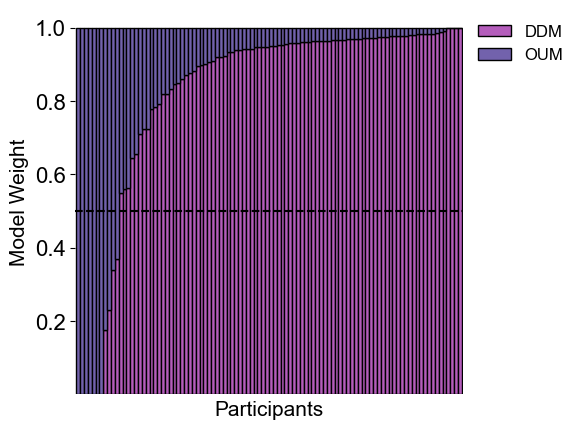

In [23]:
xlabelsize=15
titlesize = 20
figure, axes = plt.subplots(1,1,figsize=(5, 5))
ticks = [0, 0.5, 1]

models = ["DDM","OUM"] 
models = ["DDM","OUM"] 
sortby = "DDM"
plot_BIC_comparison(ax = axes,dataset = "crossfitting", models = models, sortby = sortby)
axes.set_title("") #"Fit OUM to DDM Data",fontsize = titlesize
lgd = axes.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12, frameon=False)
axes.set_xlabel("Participants", fontsize = xlabelsize, fontname='Arial')
axes.set_ylabel('Model Weight', fontsize=xlabelsize, fontname='Arial')
axes.axhline(y=0.5,linestyle="--",color='black') 
axes.tick_params(axis='y', which='major', labelsize=16)
axes.tick_params(bottom = False,labelbottom = False)
axes.spines[['left', 'right', 'top','bottom']].set_visible(False)


plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Supplementary Figures/sup_fig4.pdf",
           bbox_extra_artists=(lgd,), bbox_inches='tight')